## 3.5 & 3.6

In [2]:
# set up directory
dir_counts <- "~/Documents/Dev/SRCourse/original/Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)

In [3]:
# set up sample info
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
samplesInfo <- samplesInfo[,-c(1:2)]

In [4]:
samplesInfo
class(samplesInfo)

samplename            filename              group
1 GSM2580321_counts.txt GSM2580321_counts.txt mock 
2 GSM2580322_counts.txt GSM2580322_counts.txt ZIKV 
3 GSM2580325_counts.txt GSM2580325_counts.txt mock 
4 GSM2580326_counts.txt GSM2580326_counts.txt ZIKV 
5 GSM2580329_counts.txt GSM2580329_counts.txt mock 
6 GSM2580330_counts.txt GSM2580330_counts.txt ZIKV

[1] "data.frame"

In [19]:
library("DESeq2")
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

In [6]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

In [20]:
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


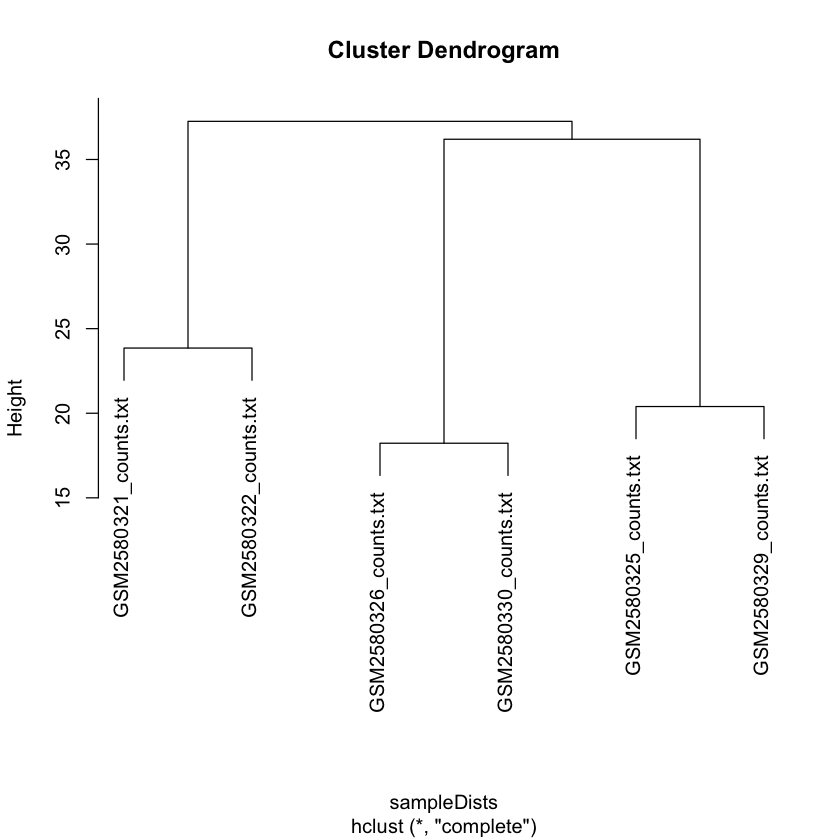

In [8]:
vsd <- varianceStabilizingTransformation(dds1_deseq)
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

## HW3.5
**1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.**

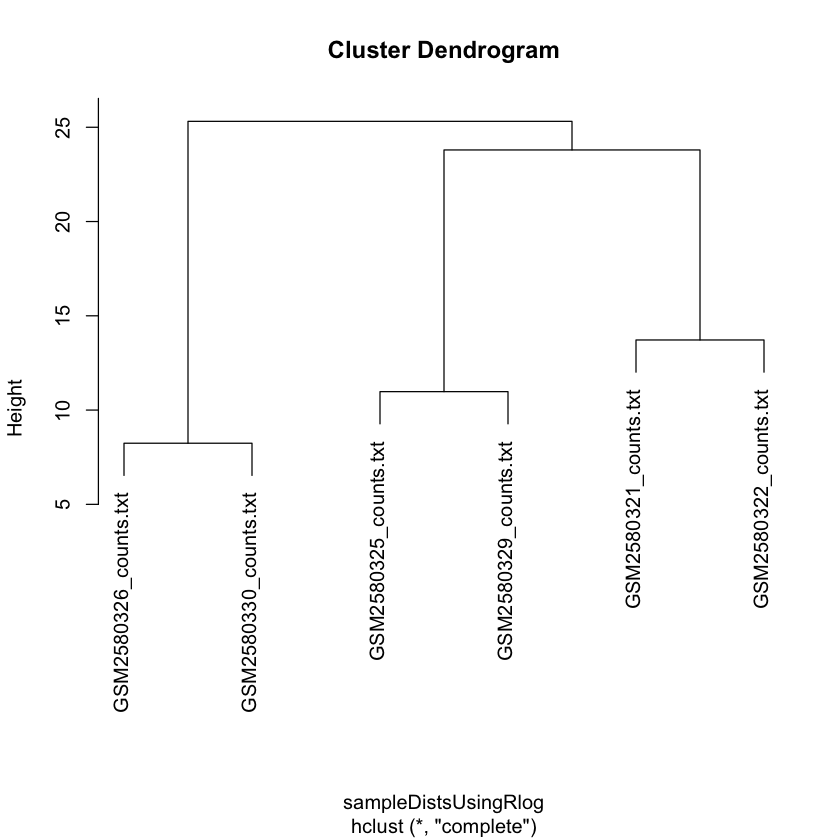

In [9]:
## perform r-log normalization
rld <- rlog(dds1_deseq)
## perform hierarchical clustering using rlog
sampleDistsUsingRlog <- dist(t(assay(rld)))
plot(hclust(sampleDistsUsingRlog))

**2) Examine the normalized counts using `head(assay(vsd))` and `head(assay(rld))`. Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample. HINT: It is possible to extract elements from `dds1`, including raw counts. **

In [10]:
head(assay(vsd))

GSM2580321_counts.txt GSM2580322_counts.txt
ENSG00000000003 10.581933             10.351826            
ENSG00000000005  7.543589              7.462387            
ENSG00000000419 10.112493             10.064517            
ENSG00000000457  9.573418              9.568217            
ENSG00000000460  9.527347              9.437986            
ENSG00000000938  7.517564              7.600088            
                GSM2580325_counts.txt GSM2580326_counts.txt
ENSG00000000003 10.554269             10.311659            
ENSG00000000005  7.543006              7.528540            
ENSG00000000419 10.172314             10.165253            
ENSG00000000457  9.604100              9.542536            
ENSG00000000460  9.518270              9.355540            
ENSG00000000938  7.511530              7.766691            
                GSM2580329_counts.txt GSM2580330_counts.txt
ENSG00000000003 10.431451             10.199156            
ENSG00000000005  7.569880              7.569783            
ENSG00000000419 10.005934             10.059106            
ENSG00000000457  9.608829              9.666379            
ENSG00000000460  9.416553              9.445563            
ENSG00000000938  7.432395              7.817386

In [11]:
head(assay(rld))

GSM2580321_counts.txt GSM2580322_counts.txt
ENSG00000000003 10.196392             10.023092            
ENSG00000000005  2.676511              2.660325            
ENSG00000000419  9.678356              9.642046            
ENSG00000000457  8.948431              8.944551            
ENSG00000000460  8.804458              8.736003            
ENSG00000000938  3.406941              3.427750            
                GSM2580325_counts.txt GSM2580326_counts.txt
ENSG00000000003 10.174645             9.993082             
ENSG00000000005  2.676335             2.673147             
ENSG00000000419  9.723202             9.718194             
ENSG00000000457  8.971801             8.925098             
ENSG00000000460  8.796647             8.673637             
ENSG00000000938  3.407257             3.483098             
                GSM2580329_counts.txt GSM2580330_counts.txt
ENSG00000000003 10.083329             9.907657             
ENSG00000000005  2.684148             2.683100             
ENSG00000000419  9.595497             9.637688             
ENSG00000000457  8.976018             9.020128             
ENSG00000000460  8.718293             8.741719             
ENSG00000000938  3.382787             3.507106

In [12]:
head(assay(dds1))

GSM2580321_counts.txt GSM2580322_counts.txt
ENSG00000000003 1138                  880                  
ENSG00000000005    6                    3                  
ENSG00000000419  754                  680                  
ENSG00000000457  447                  419                  
ENSG00000000460  426                  365                  
ENSG00000000938    5                    8                  
                GSM2580325_counts.txt GSM2580326_counts.txt
ENSG00000000003 930                   833                  
ENSG00000000005   5                     5                  
ENSG00000000419 666                   731                  
ENSG00000000457 386                   400                  
ENSG00000000460 353                   327                  
ENSG00000000938   4                    17                  
                GSM2580329_counts.txt GSM2580330_counts.txt
ENSG00000000003 2113                  919                  
ENSG00000000005   15                    8                  
ENSG00000000419 1443                  809                  
ENSG00000000457  979                  554                  
ENSG00000000460  799                  440                  
ENSG00000000938    5                   25

---

In [13]:
## First check the sample table we are selecting from
colData(dds1_deseq)

DataFrame with 6 rows and 2 columns
                         group        sizeFactor
                      <factor>         <numeric>
GSM2580321_counts.txt     mock 0.914347097327985
GSM2580322_counts.txt     ZIKV 0.861713044902337
GSM2580325_counts.txt     mock 0.764939157100768
GSM2580326_counts.txt     ZIKV  0.84496827192185
GSM2580329_counts.txt     mock  1.93068645055948
GSM2580330_counts.txt     ZIKV   1.0303145068499

In [14]:
## Specify sample groups that should be compared
res <- results(dds1_deseq, contrast=c("group", "ZIKV", "mock"))
res

log2 fold change (MLE): group ZIKV vs mock 
Wald test p-value: group ZIKV vs mock 
DataFrame with 58735 rows and 6 columns
                         baseMean       log2FoldChange              lfcSE
                        <numeric>            <numeric>          <numeric>
ENSG00000000003  1075.63906962851   -0.292138552730903 0.0965015645303186
ENSG00000000005  6.33853718932102   -0.283335284056721  0.840671238767424
ENSG00000000419   813.68939359019  0.00256337467730136  0.101739836787501
ENSG00000000457  499.648910083186 -0.00215071944894734  0.111152173317996
ENSG00000000460  429.808167012587    -0.10958129780589  0.120593088725289
...                           ...                  ...                ...
ENSG00000285990 0.597527409245946    -1.06736058349928   3.37327270111844
ENSG00000285991   2.3494385123837     1.87259702463587   1.66805197384659
ENSG00000285992                 0                   NA                 NA
ENSG00000285993                 0                   NA         

In [15]:
## sort the gene by adjusted p-value
resSorted <- res[order(res$padj),]
head(resSorted)

log2 fold change (MLE): group ZIKV vs mock 
Wald test p-value: group ZIKV vs mock 
DataFrame with 6 rows and 6 columns
                        baseMean   log2FoldChange             lfcSE
                       <numeric>        <numeric>         <numeric>
ENSG00000213928 512.187721168106 3.27507529008383 0.199747644686085
ENSG00000059378 336.458301796665 3.72099716105068 0.276732956924328
ENSG00000157601 4008.96259771101 5.68040787674336 0.475308620229343
ENSG00000108679 5768.88412825511 1.58820729548322  0.13817689681707
ENSG00000115415  14617.158612877 3.57704283976823 0.333979738711162
ENSG00000187608 3876.78300136491 4.74071973993298 0.450824815194358
                            stat               pvalue                 padj
                       <numeric>            <numeric>            <numeric>
ENSG00000213928 16.3960646205907 2.04034625404368e-60 3.48572754040823e-56
ENSG00000059378 13.4461655829023 3.24255798151487e-41    2.76979302781e-37
ENSG00000157601 11.9509885471938 6.41

In [16]:
# Set up look up API
library("biomaRt")
bm <- useMart(biomart = "ensembl")
bm <- useDataset(dataset = "hsapiens_gene_ensembl", mart = bm)
ens2genesymbol <- getBM(mart = bm, attributes = c('ensembl_gene_id', 'external_gene_name'))

## HW3.6
**Look up the top 10 differentially expressed genes by p value and print their gene names. Does this gene list suggest what biological pathway could be involved?  **

In [17]:
n <- 10
geneList <- list()
for (i in 1 : n) {
        ref <- which(ens2genesymbol$ensembl_gene_id %in% rownames(resSorted)[i])
        name <- ens2genesymbol[ref, "external_gene_name"]
        geneList[[i]] <- ref
        names(geneList)[i] <- name
}

names(geneList)

[1] "IRF9"     "PARP12"   "MX1"      "LGALS3BP" "STAT1"    "ISG15"   
 [7] "OAS3"     "OAS2"     "C5orf56"  "IRF7"

Antiviral genes developed by human body facing Zika

**Export the table of differentially expressed genes in a comma- or tab-delimited format.**

In [21]:
as.data.frame(geneList)

IRF9 PARP12 MX1   LGALS3BP STAT1 ISG15 OAS3  OAS2  C5orf56 IRF7 
1 8416 60472  29877 19844    30151 8356  22049 22702 23114   48774

In [22]:
write.csv(geneList, file = 'geneList.csv')